In [1]:
# biblioteki
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
#dane
data_wszystko = pd.read_csv("tablica_1.csv", sep=";")
data_miasto = pd.read_csv("tablica_1_miasto.csv", sep=";")
data_wies = pd.read_csv("tablica_1_wies.csv", sep=";")

In [3]:
y = data_wszystko.values.transpose()
y1 = {"Grupy wieku":y[0],"0-6":y[1], "7 - 14":y[2], "15 - 18":y[3], "19 - 24":y[4],"25-44":y[5], "45 - 59/64":y[6], "emeryci":y[7],"ogolem":y[8]}
y1 = pd.DataFrame(y1)
emeryci = pd.DataFrame({"Grupy wieku":y[0],"emeryci":y[7]})
pracujacy = pd.DataFrame({"Grupy wieku":y[0],"pracujacy":y1["25-44"]+y1["45 - 59/64"]})
stosunek = pd.DataFrame({"Grupy wieku":y[0],'stosunek':(pracujacy['pracujacy']/emeryci['emeryci'])})
y = y1["emeryci"]
emeryciPrzecietna = ((np.sum(y)-y[0]-y[len(y)-1])/(len(y)-1)).round(1)
y = y1["25-44"]+y1["45 - 59/64"]
pracujacyPrzecietna = ((np.sum(y)-y[0]-y[len(y)-1])/(len(y)-1)).round(1)
print(f"emeryci:{emeryciPrzecietna}\npracujacy:{pracujacyPrzecietna}")


emeryci:6000.1
pracujacy:19077.2


In [4]:
stosunek['p_absol_j'] = stosunek['stosunek']-stosunek.loc[0,'stosunek']
stosunek['p_absol_l'] = stosunek['stosunek'].diff(1)
stosunek['p_wzgl_j'] = stosunek['p_absol_j']/stosunek.loc[0, 'stosunek']
stosunek['p_wzgl_l'] = stosunek['p_absol_l']/stosunek['stosunek'].shift(1)
stosunek['i_dyn_j'] = stosunek['stosunek']/stosunek['stosunek'][0]
stosunek['i_dyn_l'] = stosunek['stosunek']/stosunek['stosunek'].shift(1)
stosunek
stosunek.to_csv("stosunek_wskazniki.csv")

                            OLS Regression Results                            
Dep. Variable:                emeryci   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     362.1
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           2.71e-18
Time:                        15:37:46   Log-Likelihood:                -227.74
No. Observations:                  32   AIC:                             459.5
Df Residuals:                      30   BIC:                             462.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.187e+05   1.18e+04    -18.501      0.0

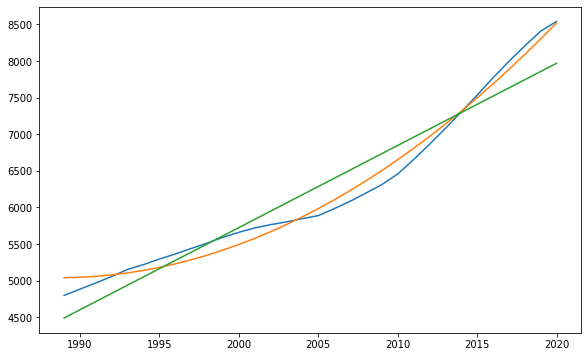

In [5]:
emeryci['x'] = emeryci['Grupy wieku']
poly_1 = smf.ols(formula='emeryci ~ 1 + x', data=emeryci).fit()
print(poly_1.summary())
poly_2 = smf.ols(formula='emeryci ~ 1 + x +I(x**2)', data=emeryci).fit()
poly_3 = smf.ols(formula='emeryci ~ 1 + x +I(x**2) +I(x**3)', data=emeryci).fit()
plt.figure(figsize=(6 * 1.618, 6))
plt.plot(emeryci.x, emeryci.emeryci)
#plt.plot(emeryci.x, poly_3.predict(emeryci))
plt.plot(emeryci.x, poly_2.predict(emeryci))
plt.plot(emeryci.x, poly_1.predict(emeryci))
print(poly_1.predict(emeryci))

In [6]:
print(poly_2.summary())

                            OLS Regression Results                            
Dep. Variable:                emeryci   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1050.
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           8.82e-28
Time:                        15:37:48   Log-Likelihood:                -200.12
No. Observations:                  32   AIC:                             406.2
Df Residuals:                      29   BIC:                             410.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.405e+07   1.23e+06     11.395      0.0

In [7]:
print(poly_3.summary())

                            OLS Regression Results                            
Dep. Variable:                emeryci   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1065.
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           7.19e-28
Time:                        15:37:48   Log-Likelihood:                -199.90
No. Observations:                  32   AIC:                             405.8
Df Residuals:                      29   BIC:                             410.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3488      0.914     11.320      0.0

In [8]:
print(poly_1.predict(emeryci))
print(poly_2.predict(emeryci))
print(poly_3.predict(emeryci))

0     4490.153409
1     4602.365286
2     4714.577163
3     4826.789040
4     4939.000916
5     5051.212793
6     5163.424670
7     5275.636547
8     5387.848424
9     5500.060301
10    5612.272177
11    5724.484054
12    5836.695931
13    5948.907808
14    6061.119685
15    6173.331562
16    6285.543438
17    6397.755315
18    6509.967192
19    6622.179069
20    6734.390946
21    6846.602823
22    6958.814699
23    7071.026576
24    7183.238453
25    7295.450330
26    7407.662207
27    7519.874084
28    7632.085960
29    7744.297837
30    7856.509714
31    7968.721591
dtype: float64
0     5040.612963
1     5046.284280
2     5059.058301
3     5078.935026
4     5105.914455
5     5139.996588
6     5181.181425
7     5229.468966
8     5284.859211
9     5347.352160
10    5416.947812
11    5493.646169
12    5577.447230
13    5668.350995
14    5766.357464
15    5871.466637
16    5983.678514
17    6102.993094
18    6229.410379
19    6362.930368
20    6503.553061
21    6651.278458
22    6806.10

In [9]:
stosunek['x'] = stosunek['Grupy wieku']
poly_1 = smf.ols(formula='stosunek ~ 1 + x', data=stosunek).fit()
poly_2 = smf.ols(formula='stosunek ~ 1 + x + I(x**2)', data=stosunek).fit()
poly_3 = smf.ols(formula='stosunek ~ 1 + x + I(x**2) + I(x**3)', data=stosunek).fit()
print(poly_1.summary())

                            OLS Regression Results                            
Dep. Variable:               stosunek   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     232.8
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           1.11e-15
Time:                        15:37:49   Log-Likelihood:                 18.948
No. Observations:                  32   AIC:                            -33.90
Df Residuals:                      30   BIC:                            -30.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.1742      5.305     15.866      0.0

In [10]:
print(poly_2.summary())

                            OLS Regression Results                            
Dep. Variable:               stosunek   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     215.2
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           4.01e-18
Time:                        15:37:49   Log-Likelihood:                 28.427
No. Observations:                  32   AIC:                            -50.85
Df Residuals:                      29   BIC:                            -46.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4638.3583    975.376     -4.755      0.0

In [11]:
print(poly_3.summary())

                            OLS Regression Results                            
Dep. Variable:               stosunek   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     216.6
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           3.67e-18
Time:                        15:37:49   Log-Likelihood:                 28.524
No. Observations:                  32   AIC:                            -51.05
Df Residuals:                      29   BIC:                            -46.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0034      0.001     -4.699      0.0

In [12]:
print(poly_1.predict(stosunek))
print(poly_2.predict(stosunek))
print(poly_3.predict(stosunek))

0     3.853560
1     3.813178
2     3.772796
3     3.732413
4     3.692031
5     3.651648
6     3.611266
7     3.570883
8     3.530501
9     3.490119
10    3.449736
11    3.409354
12    3.368971
13    3.328589
14    3.288206
15    3.247824
16    3.207442
17    3.167059
18    3.126677
19    3.086294
20    3.045912
21    3.005529
22    2.965147
23    2.924764
24    2.884382
25    2.844000
26    2.803617
27    2.763235
28    2.722852
29    2.682470
30    2.642087
31    2.601705
dtype: float64
0     3.671379
1     3.666258
2     3.658785
3     3.648962
4     3.636789
5     3.622264
6     3.605389
7     3.586163
8     3.564586
9     3.540659
10    3.514381
11    3.485752
12    3.454773
13    3.421442
14    3.385762
15    3.347730
16    3.307347
17    3.264614
18    3.219530
19    3.172096
20    3.122310
21    3.070174
22    3.015688
23    2.958850
24    2.899662
25    2.838123
26    2.774233
27    2.707993
28    2.639402
29    2.568460
30    2.495167
31    2.419524
dtype: float64
0     3.67

In [13]:
ig = (emeryci['emeryci'][len(emeryci)-1]/emeryci['emeryci'][0])**(1/(len(emeryci)-1))
kolejni_emeryci = []
for i in range(10):
    kolejni_emeryci.append(emeryci['emeryci'][len(emeryci)-1]*(ig)**i)
T = (ig-1)*100
print(T)

1.8772803515570535


In [14]:
ig = (stosunek['stosunek'][len(stosunek)-1]/stosunek['stosunek'][0])**(1/(len(stosunek)-1))
kolejne_stosunki = []
for i in range(10):
    kolejne_stosunki.append(stosunek['stosunek'][len(stosunek)-1]*(ig)**i)
T = (ig-1)*100
a = pd.DataFrame({'a':kolejne_stosunki})
a

,a
0,2.351639
1,2.314840
2,2.278617
3,2.242961
4,2.207863
5,2.173314
6,2.139305
7,2.105829
8,2.072876
9,2.040439
